In [10]:
import pandas
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Aufgabe 1)

### 1) Laden Sie die CSV `Weekly.csv` in einen Pandas DataFrame

In [11]:
df = pandas.read_csv("Weekly.csv")

### 2) Verschaffen Sie sich einen Überblick über die Daten

In [12]:
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


### 3) Erstellen Sie mit `sklearn.linear_model.LogisticRegression` einen Klassifikator von `Lag1` bis `Lag5` und `Volume` auf `Direction`. Teilen Sie dabei den Datensatz in zwei in etwa gleich große Trainings- und Testdatensätze bei `random_state=0` auf

In [13]:
df["Direction"] = df["Direction"].map({"Up": 1, "Down": 0})
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [14]:
Xtrain, Xtest = train_test_split(df[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]], test_size=0.5, random_state=0)
ytrain, ytest = train_test_split(df["Direction"], test_size=0.5, random_state=0)

lr = LogisticRegression().fit(Xtrain, ytrain)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4) Erstellen Sie mit `sklearn.metrics.confusion_matrix` die Wahrheitsmatrix der Vorhersage auf den Testdaten. Legen Sie dabei die Reihenfolge der Labels auf `Up` gefolgt von `Down` fest.

In [15]:
ypred = lr.predict(Xtest)
cf = confusion_matrix(y_true=ytest, y_pred=ypred, labels=[1, 0])
cf

array([[228,  83],
       [171,  63]])

### 5) Berechnen Sie manuell die Größen `Genauigkeit`, `Präzision` und `Trefferquote`

Genauigkeit ($\frac{TP + TN}{TP + TN + FP + FN}$): Anteil der korrekt klassifizierten Daten am Gesamtdatensatz

Präzision ($\frac{TP}{TP + FP}$): Anteil der korrekt positiv vorhergesagten Datensätze an der Gesamtheit der als positiv vorhergesagten Datensätze

Trefferquote ($\frac{TP}{FP + FN}$): Anteil der korrekt positiv vorhergesagten Datensätze an der Gesamtheit der echt positiven Datensätze

In [16]:
TP = cf[0][0]
FN = cf[0][1]
FP = cf[1][0]
TN = cf[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Genaugikeit:", accuracy, "\nPräzision:", precision, "\nTrefferquote:", recall)

Genaugikeit: 0.5339449541284403 
Präzision: 0.5714285714285714 
Trefferquote: 0.7331189710610932


### 6) Interpretieren Sie das Ergebnis. Wenn Sie auf Kursgewinne setzen wollen, könnten Sie sich auf das Modell verlassen? Welche Metrik ziehen Sie für diese Aussage heran?

- Eine Genauigkeit von ca. 0.53 besagt, dass etwas mehr als jede zweite Vorhersage unabhängig davon, ob es sich um eine positive oder negative Rendite handelt korrekt ist. 
- Die Präzision von etwa 0.57 ist ein bisschen höher und bezieht sich auf den Anteil der korrekt vorhergesagten positiven Renditen. 
- Eine Trefferquote von ca. 0.73 besagt dass ca. drei von 4 positiven Renditen tatsächlich auch vorhergesagt werden.
- Im beschriebenen Fall würde man auf Kursgewinne setzen, immer genau dann, wenn das Modell für eine zu klassifizierende Woche 'UP' vorhersagt. Daher ist wichtig zu wissen, wie oft relativ gesehen das Modell in diesem Fall richtig liegt, was durch die Präzision ausgedrückt wird. Da die Präzision nur etwas besser als der Zufall (0.50) ist, wäre es wohl nicht ratsam anhand des Modells zu spekulieren.

### 7) Trainieren Sie ein neues logistisches Regressionsmodell, diesmal lediglich von `Lag2` auf `Direction`. Verwenden Sie ebenfalls eine gleichmäßige Aufteilung des Datensatzes

In [17]:
Xtrain, Xtest = train_test_split(df[["Lag2"]], test_size=0.5, random_state=0)
ytrain, ytest = train_test_split(df["Direction"], test_size=0.5, random_state=0)

lr = LogisticRegression().fit(Xtrain, ytrain)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 8) Erstellen Sie mit `matplotlib.pyplot` einen Plot der Klassenwahrscheinlichkeiten von `Down` und `Up` in Abhängigkeit von `Lag2` anhand des Modells für $lag2\in [-50,50]$

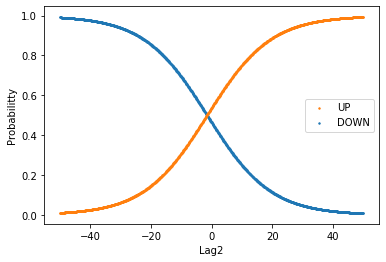

In [20]:
lag2_vals = np.arange(-50, 50, 0.1)
probabilities = lr.predict_proba(X=lag2_vals.reshape(-1,1))
down = plt.scatter(x=lag2_vals, y=probabilities[:, 0], s=2)
up = plt.scatter(x=lag2_vals, y=probabilities[:, 1], s=2)
plt.xlabel("Lag2")
plt.ylabel("Probabilitty")
plt.legend((up, down), ('UP', 'DOWN'))
plt.show()

### 9) Wo befindet sich die Entscheidungsoberfläche? Wie lautet die Klassifikationsregel des Modells?

In [21]:
lag2_vals[np.argwhere(probabilities[:,1] >= 0.5).min()]

-1.4999999999993108

Ab einer prozentualen Rendite zu 2 Wochen zuvor von $> -1.5\%$ wird als `UP` klassifiziert, ansonsten als `DOWN`.

Die Entscheidungsoberfläche ist $Lag2 = -1.5$. Die Klassifikationsregel lautet $$f(\texttt{Lag2}) = \begin{cases} \texttt{Down} & \text{wenn } \texttt{Lag2} < -1.5 \\ \texttt{Up} & \text{wenn } \texttt{Lag2} \geq -1.5\end{cases}$$